In [1]:
import numpy as np
import pyfftw as pfft
import cupy as cp

from IO import cfl
from FFT import fft
from util import process_3d
from util import phase_3d
from scipy import sparse
from scipy import optimize

from NUFFT import nufft_gpu
from util import imshow_3d

In [2]:
traj = cfl.readcfl(name='GPI_traj')
img = cfl.readcfl(name='trash0')
pattern = cfl.readcfl(name='GPI_dcf')
NFT = nufft_gpu.NUFFT3D(np.real(traj),pattern = pattern)
img1 = NFT.Toeplitz(img)

Est. kspace size: [[-200  200]
 [-200  200]
 [ -41   41]]
(500000, 5, 5, 5) (500000, 125) 500000 (500000, 1, 1, 5)
Batch Toepliz time: 21.508432626724243
(500000, 5, 5, 5) (500000, 125) 500000 (500000, 1, 1, 5)
Batch Toepliz time: 42.46342706680298
(500000, 5, 5, 5) (500000, 125) 500000 (500000, 1, 1, 5)
Batch Toepliz time: 61.80683135986328
(500000, 5, 5, 5) (500000, 125) 500000 (500000, 1, 1, 5)
Batch Toepliz time: 82.30888652801514
(490000, 5, 5, 5) (490000, 125) 490000 (490000, 1, 1, 5)
Batch Toepliz time: 103.03783869743347


In [2]:
traj = cfl.readcfl(name='GPI_traj')
img = cfl.readcfl(name='trash0')
pattern = cfl.readcfl(name='GPI_dcf')
NFT = nufft_gpu.NUFFT3D(np.real(traj),pattern = pattern)
ksp = NFT.forward(img)

Est. kspace size: [[-200  200]
 [-200  200]
 [ -41   41]]


ValueError: total size of new array must be unchanged

In [2]:
traj = cfl.readcfl(name='GPI_traj')
data = cfl.readcfl(name='cGPI_data')
pattern = cfl.readcfl(name='GPI_dcf')
NFT = nufft_gpu.NUFFT3D(np.real(traj),pattern = pattern)
img = NFT.adjoint(data)


Est. kspace size: [[-200  200]
 [-200  200]
 [ -41   41]]
(1, 2490000, 1, 16, 1, 1) (1, 2490000, 1, 1, 1, 1)
Batch Grid time: 6.592532634735107
Batch Grid time: 13.087360382080078
Batch Grid time: 19.104677200317383
Batch Grid time: 25.322913885116577
Batch Grid time: 31.746037006378174


In [4]:
img = cfl.readcfl('trash0')

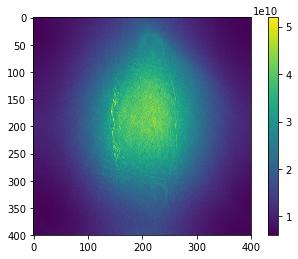

In [6]:
img0 = np.sqrt(np.sum(np.abs(img1**2),axis=3))
imshow_3d.imshow3d(np.abs(img0[:,:,30]))

In [4]:
cfl.writecfl('trash0',img)

In [36]:
a = cp.zeros([6,3,2],dtype=cp.float32)
b = cp.ones([1,3],dtype=cp.int32)
c = cp.array([[4,2,3],[4,5,6],[7,8,9]])
a+b

ValueError: Broadcasting failed

In [13]:
from FFT import fft
a = np.random.randn(3,3,3)
A = fft.fft(shape=1,axes=(0,1,2))
b = A.FT(np.conj(A.IFT(a)))
print(a,b)

[[[ 0.66031676  1.73552088  0.22728676]
  [-1.73919604 -1.82638269 -1.06598275]
  [ 1.57085518  1.1546299   0.57033054]]

 [[-1.25244151  0.26605788 -1.73514751]
  [-0.57570063  1.38611562  1.30695515]
  [-0.55059947  0.75505919 -1.62087938]]

 [[ 0.12225991 -1.41111094 -0.57434921]
  [-0.9092014  -0.95746267  1.18512674]
  [ 1.19832655 -0.05858701 -0.58449009]]] [[[-0.58449009-0.j -0.05858701+0.j  1.19832655+0.j]
  [ 1.18512674+0.j -0.95746267+0.j -0.9092014 +0.j]
  [-0.57434921+0.j -1.41111094+0.j  0.12225991+0.j]]

 [[-1.62087938+0.j  0.75505919+0.j -0.55059947+0.j]
  [ 1.30695515+0.j  1.38611562+0.j -0.57570063+0.j]
  [-1.73514751+0.j  0.26605788+0.j -1.25244151+0.j]]

 [[ 0.57033054+0.j  1.1546299 +0.j  1.57085518+0.j]
  [-1.06598275+0.j -1.82638269+0.j -1.73919604+0.j]
  [ 0.22728676+0.j  1.73552088+0.j  0.66031676+0.j]]]


In [1]:
import tensorflow as tf

ImportError: Traceback (most recent call last):
  File "/home/xczhu/anaconda3/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/home/xczhu/anaconda3/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/home/xczhu/anaconda3/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/home/xczhu/anaconda3/lib/python3.6/imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "/home/xczhu/anaconda3/lib/python3.6/imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: libcublas.so.9.0: cannot open shared object file: No such file or directory


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [11]:
with tf.device('/gpu:0'):
    a = tf.constant([1.0,2.0,3.0],shape = [1,3])
    b = tf.constant([1.0,2.0,3.0,4,5,6],shape = [3,2])

c = tf.matmul(a,b)

sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
print(sess.run(c))

InvalidArgumentError: Cannot assign a device for operation 'MatMul_6': Operation was explicitly assigned to /device:GPU:0 but available devices are [ /job:localhost/replica:0/task:0/device:CPU:0 ]. Make sure the device specification refers to a valid device.
	 [[Node: MatMul_6 = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/device:GPU:0"](Const_14, Const_15)]]

Caused by op 'MatMul_6', defined at:
  File "/home/xczhu/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/xczhu/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/xczhu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/xczhu/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/xczhu/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/xczhu/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/xczhu/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/xczhu/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/xczhu/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/xczhu/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/xczhu/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/xczhu/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/xczhu/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/xczhu/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/xczhu/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/xczhu/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/xczhu/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/xczhu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/xczhu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/xczhu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-6e4e968ff45a>", line 5, in <module>
    c = tf.matmul(a,b)
  File "/home/xczhu/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py", line 2108, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/home/xczhu/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 4209, in mat_mul
    name=name)
  File "/home/xczhu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/xczhu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3290, in create_op
    op_def=op_def)
  File "/home/xczhu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Cannot assign a device for operation 'MatMul_6': Operation was explicitly assigned to /device:GPU:0 but available devices are [ /job:localhost/replica:0/task:0/device:CPU:0 ]. Make sure the device specification refers to a valid device.
	 [[Node: MatMul_6 = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/device:GPU:0"](Const_14, Const_15)]]
